<a href="https://colab.research.google.com/github/Wolfman1219/DTM/blob/main/takomillashtirilgan_topshiriq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#To'g'ri javoblar generatori
def randletter(x, y):
    return chr(random.randint(ord(x), ord(y)))

In [ ]:
#To'g'ri javoblar
w = [randletter('A', 'E') for i in range(10)]
print(w)

['A', 'B', 'C', 'B', 'E', 'B', 'D', 'C', 'C', 'A']


In [ ]:
#Belgilangan varaqani o'qitish
image = cv2.imread(r"/content/drive/MyDrive/topshiriq/belgilangan2.jpg")
im = cv2.imread(r"/content/drive/MyDrive/topshiriq/variantlar_topshiriq.png", cv2.IMREAD_GRAYSCALE)
# im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

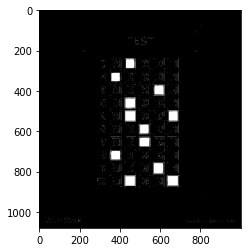

In [ ]:
#maska uchun qizil rang tanlab olindi
red = np.array([230, 0, 0])
red2 = np.array([255, 250, 250])
mask = cv2.inRange(image, red, red2)
# mask = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
plt.imshow(mask, cmap='gray')

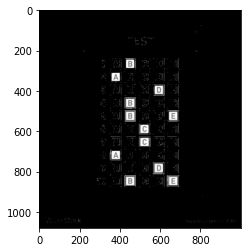

In [ ]:
#maskani ishlatish
rasm = np.copy(im)
# rasm = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
rasm[mask == 0] = [0]
# rasm = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
plt.imshow(rasm, cmap='gray')

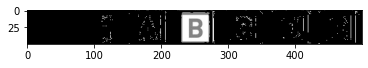

In [ ]:
#rasmni gorizontal bo'laklash
# image = cv2.imread(r"C:\Users\Abduraxim Jabborov\Desktop\belgilangan.jpg", cv2.IMREAD_GRAYSCALE)
rasmlar = []
for i in range(240, 870, 64):
    rasmlar.append(rasm[i:i+50, 200:700])
plt.imshow(rasmlar[0], cmap='gray')

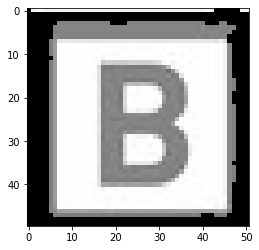

In [ ]:
#rasmni vertikal bo'laklash
rasm2 = []
for k in range(10):
  for i in range(154, 490, 71):
      rasm2.append(rasmlar[k][:, i:i+51])
plt.imshow(rasm2[1], cmap='gray')

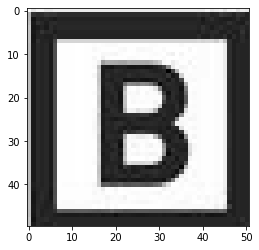

In [ ]:
#Bu standart harf sifatida olinadi va belgilangan bilan solishtiriladi
img = cv2.imread(r"/content/drive/MyDrive/topshiriq/variantlar_topshiriq.png", cv2.IMREAD_GRAYSCALE)
rasmlar1 = []
for i in range(240, 870, 64):
    rasmlar1.append(img[i:i+50, 200:700])
# plt.imshow(rasmlar[0])
rasm3 = []
for i in range(154, 490, 71):
    rasm3.append(rasmlar1[0][:, i:i+51])
d ={'A': 0,
    'B': 0,
    'C': 0,
    'D': 0,
    'E': 0}
k=0
for i in d.keys():
  d[i] = rasm3[k]
  k = k + 1
plt.imshow(d['B'], cmap='gray')

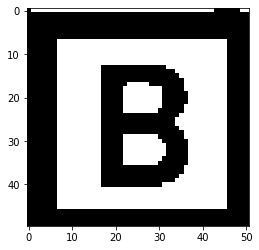

In [ ]:
qo = []
for i in d.values():
  a, b = cv2.threshold(i, 240,255, cv2.THRESH_BINARY)
  qo.append(b)
qo1 = []
for i in rasm2:
  a, b = cv2.threshold(i, 180, 255, cv2.THRESH_BINARY)
  qo1.append(b)
k = 0
for i in d.keys():
  d[i] = qo[k]
  k = k+1
plt.imshow(qo1[1], cmap='gray')

In [ ]:
def farq(qo, qo1):
  difference = cv2.subtract(qo, qo1)
  return cv2.countNonZero(difference)
def GetKey(val):
   for key, value in dictA.items():
      if val == value:
         return key

In [ ]:
a = []
k = 0
s = 0
for i in range(10):
  for j in d.keys():
    print(farq(d[j], qo1[k]), end=' ')
    if farq(d[j], qo1[k]) <600:
      a.append(j); s= s+1  
      #print(farq(d[j], qo1[k]), end=' ')
    k = k+1
  if s >=2:
    for l in range(s-1):
      a.pop(i)
    a[i] = 'O'
  s = 0

  print()
print(a)

1077 5 1088 1017 1055 
48 978 1089 999 1037 
1087 983 1089 65 1043 
1107 78 1084 1026 1041 
1087 144 1099 1009 149 
1102 1005 153 1031 1047 
1068 994 205 992 1049 
201 1008 1104 1035 1055 
1103 1011 1105 266 1060 
1116 309 1102 1011 321 
['B', 'A', 'D', 'B', 'O', 'C', 'C', 'A', 'D', 'O']


In [ ]:
k = 0
for i in range(len(a)):
  if a[i] == w[i]:
    print(f"{i+1} -javob to'g'ri   ","\N{grinning face}")
    k = k+1
  else:
    print(f"{i+1} -javob noto'g'ri ", "\N{anguished face}")
# print(k)
print(f"to'g'ri javoblar soni {k} ta. Natija {k*10} % ")


1 -javob noto'g'ri  😧
2 -javob noto'g'ri  😧
3 -javob noto'g'ri  😧
4 -javob to'g'ri    😀
5 -javob noto'g'ri  😧
6 -javob noto'g'ri  😧
7 -javob noto'g'ri  😧
8 -javob noto'g'ri  😧
9 -javob noto'g'ri  😧
10 -javob noto'g'ri  😧
to'g'ri javoblar soni 1 ta. Natija 10 % 
